In [2]:
import numpy as np

import util
from p01b_logreg import LogisticRegression

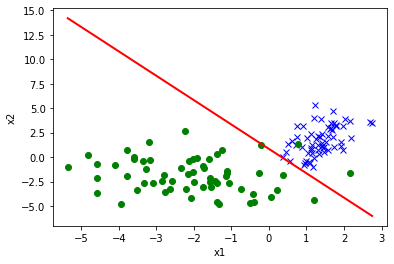

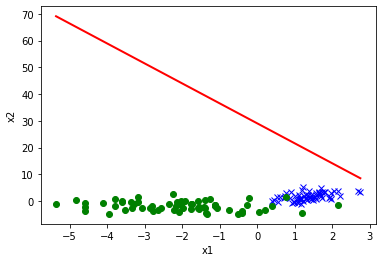

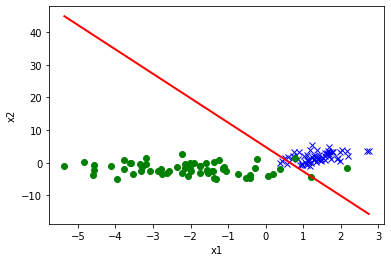

In [3]:
if __name__ == '__main__':
    train_path='../data/ds3_train.csv'
    valid_path='../data/ds3_valid.csv'
    test_path='../data/ds3_test.csv'
    pred_path='../output/p02X_pred.txt'
    # Character to replace with sub-problem letter in plot_path/pred_path
    WILDCARD = 'X'
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on y-labels,
        2. on l-labels,
        3. on l-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    pred_path_c = pred_path.replace(WILDCARD, 'c')
    pred_path_d = pred_path.replace(WILDCARD, 'd')
    pred_path_e = pred_path.replace(WILDCARD, 'e')

    # *** START CODE HERE ***
    # Part (c): Train and test on true labels
    x_train, t_train = util.load_dataset(train_path, label_col='t', add_intercept=True)
    model = LogisticRegression(max_iter=100)
    model.fit(x_train, t_train)
    x_test, t_test = util.load_dataset(test_path, label_col='t', add_intercept=True)
    t_pred = model.predict(x_test)
    util.plot(x_test, t_test, model.theta, '{}.png'.format(pred_path_c))
    np.savetxt(pred_path_c, t_pred)
    
    # Part (d): Train on y-labels and test on true labels
    x_train, y_train = util.load_dataset(train_path, label_col='y', add_intercept=True)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    x_test, t_test = util.load_dataset(test_path, label_col='t', add_intercept=True)
    t_pred = model.predict(x_test)
    util.plot(x_test, t_test, model.theta, '{}.png'.format(pred_path_d))
    np.savetxt(pred_path_d, t_pred)
    
    # Part (e): Apply correction factor using validation set and test on true labels
    x_val, y_val = util.load_dataset(valid_path, label_col='y', add_intercept=True)
    y_pred = model.predict(x_val)
    alpha = y_pred[y_val == 1].sum() / (y_val == 1).sum()
    
    correction = 1 + (np.log(2 / alpha - 1) / model.theta[0])
    # correction = 1
    # Plot and use np.savetxt to save outputs
    util.plot(x_test, t_test, model.theta, '{}.png'.format(pred_path_e), correction=correction)
    np.savetxt(pred_path_e, t_pred)
    
    
    # *** END CODE HERE